In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
 
import os
import pandas as pd
import numpy as np
a = [name for name in os.listdir(".") if os.path.isdir(name)]
d = pd.DataFrame()
for i in a:
    if i != '.git' or i!= 'Test':
        b = os.listdir(i)
        b = np.array(b)
        c = pd.DataFrame(b, columns=['filename'])
        c['Class'] = i
        #append to the master dataframe
        d = d.append(c)

from pathlib import Path


df = d
df.head()

# Construct file path by concatenating fold and file name
df['relative_path'] = df['Class'] + '/' + df['filename'].astype(str)
df = df.sample(frac=1)
label_encoder = preprocessing.LabelEncoder()

df['classID'] = label_encoder.fit_transform(df['Class'])

# Take relevant columns
df = df[['relative_path', 'classID','Class']]
df.head()
df.to_csv('train.csv', index=False)



In [2]:
df

,relative_path,classID,Class
385,Whimper/2MsYfIPAkB4_30.wav,15,Whimper
64,Clapping/3tZwB9noSRU_50.wav,6,Clapping
1298,Whimper/Knh6TSkrpU0_2.wav,15,Whimper
253,Whispering/AY-nUhImqmA_30.wav,16,Whispering
339,Whispering/F5nrb8JP3i0_460.wav,16,Whispering
...,...,...,...
138,Whoop/4RyDDXLZLy8_30.wav,17,Whoop
74,Whispering/1y29-ZH39tg_30.wav,16,Whispering
476,Whimper/3eZrNSkyUmA_30.wav,15,Whimper
414,Speech/0H5JmqKp9s8_60.wav,12,Speech


In [3]:
df.Class.unique()

array(['Whimper', 'Clapping', 'Whispering', 'Screaming', 'Speech',
       'Singing', 'Breathing', 'Snicker', 'Children shouting',
       'Wail, moan', 'Whoop', 'Groan', 'Babbling', 'shatter', 'Bellow',
       'Yell', 'Battle cry', '.git', 'Finger snapping', 'Test'],
      dtype=object)

In [4]:
df.shape

(7353, 3)

In [5]:
df= df[df['Class'] != 'Test']

In [6]:
df.shape

(7350, 3)

In [7]:
df= df[df['Class'] != '.git']

In [8]:
df.shape

(7337, 3)

In [9]:
#### Dependencies ####
#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
# from keras.optimizers import Adam
# from keras.utils import to_categorical

In [10]:
experiment = Experiment(
    api_key="TpJmHUzqkFIYdblKq8rPA9vKW",
    project_name="fyp-audio-processing",
    workspace="shakthi-stack",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/shakthi-stack/fyp-audio-processing/a2a5c2942da24c5089ae7ab66a126088



In [11]:
labels = list(df['classID'].unique())

In [12]:
files = dict()
for i in range(len(labels)):
    tmp = df[df['classID'] == labels[i]][:1].reset_index()
    path = df['relative_path']
    files[labels[i]] = path

In [13]:
fn = 'Snicker/6xfMfFenKiM_70.wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 16000
Librosa sample rate: 22050


In [14]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original audio file min~max range: -5272 to 4727
Librosa audio file min~max range: -0.16 to -0.16


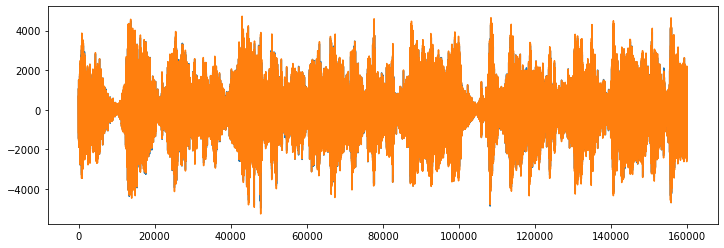

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

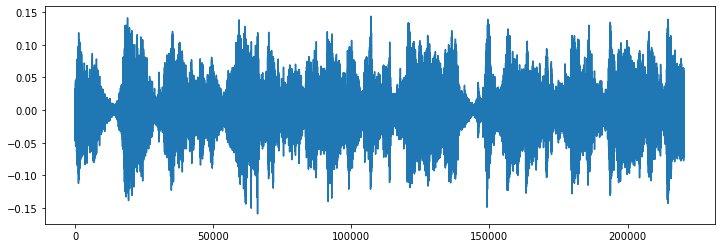

In [16]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)

In [17]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 500)

In [18]:
print(mfccs.shape)

(128, 431)


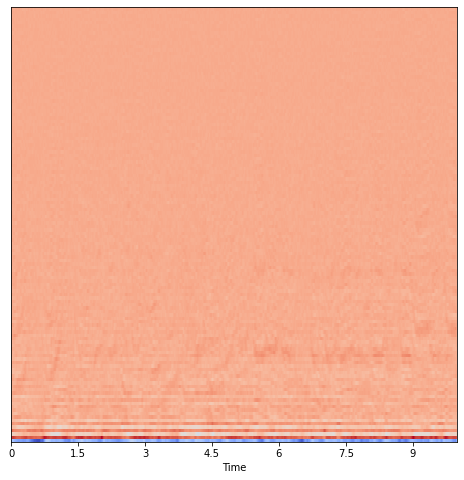

In [19]:
import librosa.display
plt.figure(figsize=(8,8))

librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [20]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
    mfccs_processed = np.mean(mfccs.T,axis=0) 
    return mfccs_processed

In [21]:
features = []
# Iterate through each sound file and extract the features 
for index, row in df.iterrows():
    file_name = row['relative_path']
    # os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"])) 
    class_label = row["Class"]
    try:
        data = extract_features(file_name)
        features.append([data, class_label])
    except:
        print("error")
        continue
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

error


In [22]:
featuresdf

,feature,class_label
0,"[-304.54288, 157.71866, -71.47469, 3.0316494, ...",Whimper
1,"[-184.59094, 152.6274, -61.10147, 12.120876, -...",Clapping
2,"[-201.50917, 134.5291, -82.118126, -2.5650594,...",Whimper
3,"[-379.8373, 176.20386, -48.3446, 54.96032, -34...",Whispering
4,"[-528.03436, 120.09583, -33.507557, 46.91244, ...",Whispering
...,...,...
7331,"[-47.641468, 131.98242, -106.880554, 63.7975, ...",Whoop
7332,"[-469.4623, 141.93727, -83.17972, 34.912132, -...",Whispering
7333,"[-427.28247, 140.70117, -65.74342, 78.60164, -...",Whimper
7334,"[-336.34644, 144.0904, -4.228979, 28.422342, -...",Speech


In [23]:
featuresdf.iloc[0]['feature']

array([-304.54288   ,  157.71866   ,  -71.47469   ,    3.0316494 ,
         11.833914  ,  -33.069572  ,    9.142597  ,   -2.3101358 ,
        -16.79078   ,   15.90947   ,   -0.7010464 ,   -4.542863  ,
         17.491346  ,   -1.7178531 ,   -3.35169   ,    8.952971  ,
         -3.5508506 ,    2.573574  ,    7.215796  ,   -3.209711  ,
          5.462391  ,    5.5080857 ,   -1.8673172 ,    6.4478846 ,
          3.710984  ,    0.79749954,    8.111752  ,    3.1351728 ,
          2.488735  ,    7.215754  ,    1.9698598 ,    3.6889849 ,
          5.188744  ,   -0.4038231 ,    3.4031012 ,    4.7548747 ,
          1.5602332 ,    5.1455526 ,    3.6704626 ,    1.7825406 ,
          5.1936765 ,    2.3700874 ,    1.547889  ,    3.9962502 ,
          1.1415229 ,    2.2402132 ,    4.1209574 ,    1.6345812 ,
          3.6264153 ,    4.6358185 ,    2.9108844 ,    4.5659547 ,
          3.3166049 ,    1.7990335 ,    3.9049685 ,    2.655174  ,
          1.9353298 ,    3.4460151 ,    2.2012959 ,    2.53669

In [24]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [25]:
X.shape

(7336, 100)

In [26]:
y

array(['Whimper', 'Clapping', 'Whimper', ..., 'Whimper', 'Speech',
       'Whispering'], dtype='<U17')

In [27]:
# split the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

In [28]:
num_labels = yy.shape[1]
filter_size = 2
def build_model_graph(input_shape=(100,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy','AUC'], optimizer='adam')
    return model
model = build_model_graph()

In [29]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 200
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/200


COMET INFO: ignoring tensorflow summary log of metrics because of keras; set `comet_ml.loggers.tensorboard_logger.LOG_METRICS = True` to override


184/184 [==============================] - 6s 6ms/step - loss: 2.3260 - accuracy: 0.2602 - auc: 0.8019 - val_loss: 2.0747 - val_accuracy: 0.3215 - val_auc: 0.8553
Epoch 2/200
184/184 [==============================] - 1s 4ms/step - loss: 2.1154 - accuracy: 0.3171 - auc: 0.8455 - val_loss: 2.0299 - val_accuracy: 0.3236 - val_auc: 0.8614
Epoch 3/200
184/184 [==============================] - 1s 4ms/step - loss: 2.0605 - accuracy: 0.3395 - auc: 0.8547 - val_loss: 1.9740 - val_accuracy: 0.3549 - val_auc: 0.8694
Epoch 4/200
184/184 [==============================] - 1s 4ms/step - loss: 2.0249 - accuracy: 0.3429 - auc: 0.8605 - val_loss: 1.9522 - val_accuracy: 0.3672 - val_auc: 0.8730
Epoch 5/200
184/184 [==============================] - 1s 4ms/step - loss: 1.9985 - accuracy: 0.3516 - auc: 0.8642 - val_loss: 1.9397 - val_accuracy: 0.3740 - val_auc: 0.8738
Epoch 6/200
184/184 [==============================] - 1s 4ms/step - loss: 1.9718 - accuracy: 0.3640 - auc: 0.8688 - val_loss: 1.9282 - v

In [30]:
# experiment.log_confusion_matrix()
output = model.predict(x_test)

In [31]:
output

array([[1.47833554e-02, 2.85361009e-03, 5.93600841e-03, ...,
        6.17408473e-03, 7.56540045e-04, 1.44111822e-04],
       [1.03059935e-03, 3.45263368e-04, 7.05197512e-04, ...,
        1.52062206e-03, 2.85382825e-03, 1.54364717e-08],
       [2.03527870e-05, 9.02439177e-04, 1.03246376e-01, ...,
        1.88473955e-01, 6.05780363e-01, 4.18592535e-05],
       ...,
       [1.90159723e-01, 7.26212049e-04, 5.12372935e-03, ...,
        8.58955644e-03, 8.15231632e-03, 2.73992307e-04],
       [3.23524349e-04, 1.74379139e-03, 3.52739444e-04, ...,
        7.14107454e-02, 9.23822373e-02, 9.38128724e-05],
       [2.72691939e-02, 1.23272889e-06, 5.67599549e-04, ...,
        4.49471379e-04, 1.54371769e-03, 1.39625400e-01]], dtype=float32)

In [32]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 78.51%
Testing Accuracy: 40.67%


In [33]:
y_test.shape

(1468, 18)

In [34]:
output.shape

(1468, 18)

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_test, output, multi_class='ovo', average='samples')

0.8710931238980607

In [36]:
roc_auc_score(y_test, output, multi_class='ovr')

0.8136057762529503

In [37]:
import librosa.display
def audiofun(fn):
    librosa_audio, librosa_sample_rate = librosa.load(fn)
    scipy_sample_rate, scipy_audio = wav.read(fn)
    print("Original sample rate: {}".format(scipy_sample_rate))
    print("Librosa sample rate: {}".format(librosa_sample_rate))
    mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 100)
    
    plt.figure(figsize=(8,8))

    librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

    mfccs_processed = np.mean(mfccs.T,axis=0)

    X = np.array(mfccs_processed.tolist())
    x=np.reshape(X,(-1,100))
    output = model.predict(x)
    return output

In [38]:
def top7Classes(output):
    class_arr = []
    #sort output descending
    output_sorted = np.sort(output, axis=1)[:,::-1]
    #first 5 elements of the output
    output_sorted = output_sorted[:,:7]
    #convert output_sorted to 1D array
    output_sorted = np.reshape(output_sorted, -1)
    #convert output_sorted to list
    output_sorted = output_sorted.tolist()
    output= np.reshape(output, -1)
    output = output.tolist()
    index = []
    for i in output_sorted:
        if i in output:
            index.append(output.index(i))
    class_name = [name for name in os.listdir(".") if os.path.isdir(name)]
    class_name.remove('Test')
    class_name.remove('.git')
    print(class_name)
    print(index)
    for i in index:
        class_arr.append(class_name[i])
    return class_arr

In [39]:
fn = 'Test/dv_test_1-[AudioTrimmer.com].wav'

Original sample rate: 44100
Librosa sample rate: 22050


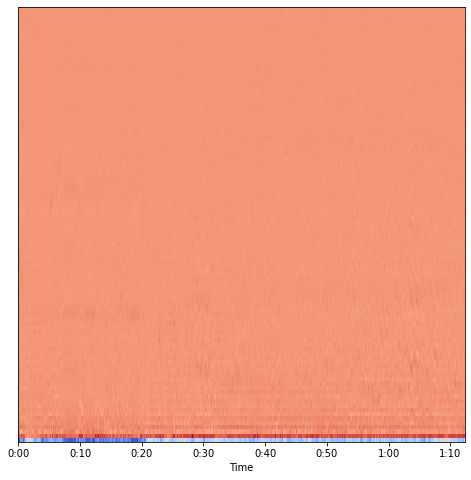

In [40]:
output = audiofun(fn)

In [41]:
output

array([[1.0940324e-02, 2.8377537e-05, 7.4386672e-04, 8.2460992e-02,
        7.6840223e-08, 5.9199108e-05, 4.7475165e-03, 9.7424062e-03,
        3.1461888e-03, 9.7354583e-04, 5.5862549e-03, 4.6524540e-01,
        4.8526580e-04, 7.2491959e-02, 3.2095435e-01, 4.4141943e-03,
        1.9774456e-03, 1.6002674e-02]], dtype=float32)

In [42]:
top7Classes(output)

['Babbling', 'Battle cry', 'Bellow', 'Breathing', 'Children shouting', 'Clapping', 'Finger snapping', 'Groan', 'Screaming', 'shatter', 'Singing', 'Snicker', 'Speech', 'Wail, moan', 'Whimper', 'Whispering', 'Whoop', 'Yell']
[11, 14, 3, 13, 17, 0, 7]


['Snicker', 'Whimper', 'Breathing', 'Wail, moan', 'Yell', 'Babbling', 'Groan']

In [43]:
fn2 = 'Test/test_2-[AudioTrimmer.com].wav'


Original sample rate: 44100
Librosa sample rate: 22050


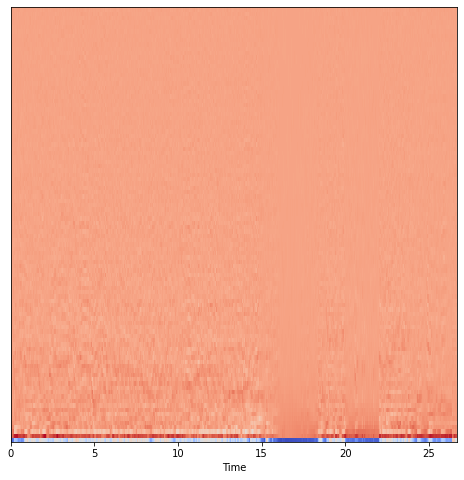

In [44]:
output = audiofun(fn2)

In [45]:
output

array([[5.80787798e-03, 4.03407357e-05, 1.27849355e-02, 1.00583076e-01,
        3.10544351e-06, 2.06098310e-03, 8.21943511e-04, 6.70744404e-02,
        5.83095327e-02, 2.42959405e-03, 3.32805738e-02, 4.49918546e-02,
        8.63507111e-03, 3.64053577e-01, 2.62001693e-01, 5.94462408e-03,
        7.05660554e-03, 2.41201930e-02]], dtype=float32)

In [46]:
a = top7Classes(output)
print(a)

['Babbling', 'Battle cry', 'Bellow', 'Breathing', 'Children shouting', 'Clapping', 'Finger snapping', 'Groan', 'Screaming', 'shatter', 'Singing', 'Snicker', 'Speech', 'Wail, moan', 'Whimper', 'Whispering', 'Whoop', 'Yell']
[13, 14, 3, 7, 8, 11, 10]
['Wail, moan', 'Whimper', 'Breathing', 'Groan', 'Screaming', 'Snicker', 'Singing']


In [47]:
toxic_list = ["Bellow","Groan","Screaming","Snicker","Wail, moan","Whimper","Yell"]

In [62]:
# def toxic_Class(a):
#     count = 0
#     for i in a:
#         if i in toxic_list:
#             count += 1
#     if count > 2:
#         print("Toxic")
#     else:
#         print("Not Toxic")

def toxic_Class_tnt(a):
    count = 0
    for i in a:
        if i in toxic_list:
            count += 1
    if count > 5:
        a_op = 'high-toxic'
        print("High Possibility of Toxicity")
    elif count <=5 and count>=3:
        a_op = 'slight-toxic'
        print("Slight Possibility of Toxicity")
    else: 
        a_op = 'non-toxic'
        print('not toxic')
    return a_op

In [49]:
toxic_Class(a)

Toxic


In [50]:
fn3 = 'Test/test_3.wav'

Original sample rate: 48000
Librosa sample rate: 22050


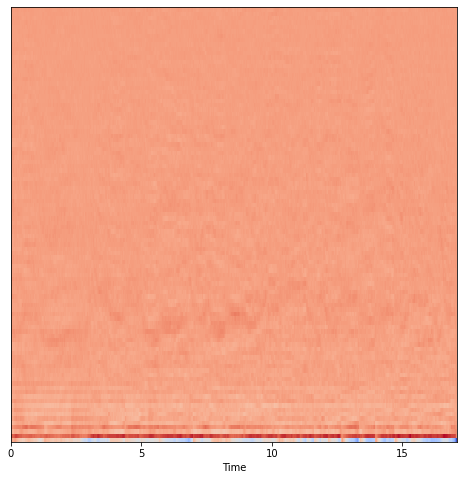

In [51]:
output3 = audiofun(fn3)

In [52]:
output3

array([[1.9249559e-03, 1.5190595e-05, 1.8172068e-04, 6.8697229e-02,
        3.9411457e-06, 1.5530912e-02, 3.5047929e-06, 1.1708844e-03,
        2.2162213e-03, 3.0831668e-01, 2.1751117e-02, 2.6388207e-01,
        1.4111203e-03, 2.7249175e-01, 4.7352623e-05, 4.1224759e-02,
        1.1288919e-03, 1.7194503e-06]], dtype=float32)

In [53]:
a = top7Classes(output3)
print(a)

['Babbling', 'Battle cry', 'Bellow', 'Breathing', 'Children shouting', 'Clapping', 'Finger snapping', 'Groan', 'Screaming', 'shatter', 'Singing', 'Snicker', 'Speech', 'Wail, moan', 'Whimper', 'Whispering', 'Whoop', 'Yell']
[9, 13, 11, 3, 15, 10, 5]
['shatter', 'Wail, moan', 'Snicker', 'Breathing', 'Whispering', 'Singing', 'Clapping']


In [54]:
# "Bellow","Groan","Screaming","Snicker","Wail, moan","Whimper","Yell"
toxic_Class(a)

Not Toxic


In [58]:
%run nlp-short.ipynb

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
0
Percentage of unlabelled comments or good comments is  89.83211235124176
Percentage of comments which is present in all categories is  0.019427088882065038
Total r

In [59]:
print(op)

toxic


In [63]:
def final_classification():
    audio_op = toxic_Class_tnt(a)
    text_op = op
    if text_op == 'toxic' and audio_op != 'non-toxic':
        final_op = 'Presence of Domestic Violence is detected'
    elif text_op == 'non-toxic' and audio_op == 'non-toxic':
        final_op = 'No Presence of Domestic Violence detected'
    elif text_op == 'toxic' and audio_op== 'non-toxic':
        final_op = 'Presence of verbal abuse detected, but no signs of actual violence'
    elif text_op == 'non-toxic' and audio_op== 'high-toxic':
        final_op = 'Presence of Domestic Violence is highly likely'
    elif text_op == 'non-toxic' and audio_op== 'slight-toxic':
        final_op = 'Disturbances detected. If conditions worsen it may point to domestic violence'
    else:
        final_op= 'Error in classification'
    return final_op

In [64]:
print(final_classification())

not toxic
Presence of verbal abuse detected, but no signs of actual violence
